--------------------------------------------------------------------------------
		Apperçu Des Données 
--------------------------------------------------------------------------------


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2.0,...,restecg_2.0,slope_2.0,slope_3.0,ca_0.6722408026755853,ca_1.0,ca_2.0,ca_3.0,thal_4.73421926910299,thal_6.0,thal_7.0
0,0.948726,1.0,0.757525,-0.264900,1.0,0.017197,0.0,1.087338,0,False,...,True,False,True,False,False,False,False,False,True,False
1,1.392002,1.0,1.611220,0.760415,0.0,-1.821905,1.0,0.397182,1,False,...,True,True,False,False,False,False,True,False,False,False
2,1.392002,1.0,-0.665300,-0.342283,0.0,-0.902354,1.0,1.346147,1,False,...,True,True,False,False,False,True,False,False,False,True
3,-1.932564,1.0,-0.096170,0.063974,0.0,1.637359,0.0,2.122573,0,False,...,False,False,True,False,False,False,False,False,False,False
4,-1.489288,0.0,-0.096170,-0.825922,0.0,0.980537,0.0,0.310912,0,True,...,True,False,False,False,False,False,False,False,False,False


(303, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    float64
 1   sex                    303 non-null    float64
 2   trestbps               303 non-null    float64
 3   chol                   303 non-null    float64
 4   fbs                    303 non-null    float64
 5   thalach                303 non-null    float64
 6   exang                  303 non-null    float64
 7   oldpeak                303 non-null    float64
 8   target                 303 non-null    int64  
 9   cp_2.0                 303 non-null    bool   
 10  cp_3.0                 303 non-null    bool   
 11  cp_4.0                 303 non-null    bool   
 12  restecg_1.0            303 non-null    bool   
 13  restecg_2.0            303 non-null    bool   
 14  slope_2.0              303 non-null    bool   
 

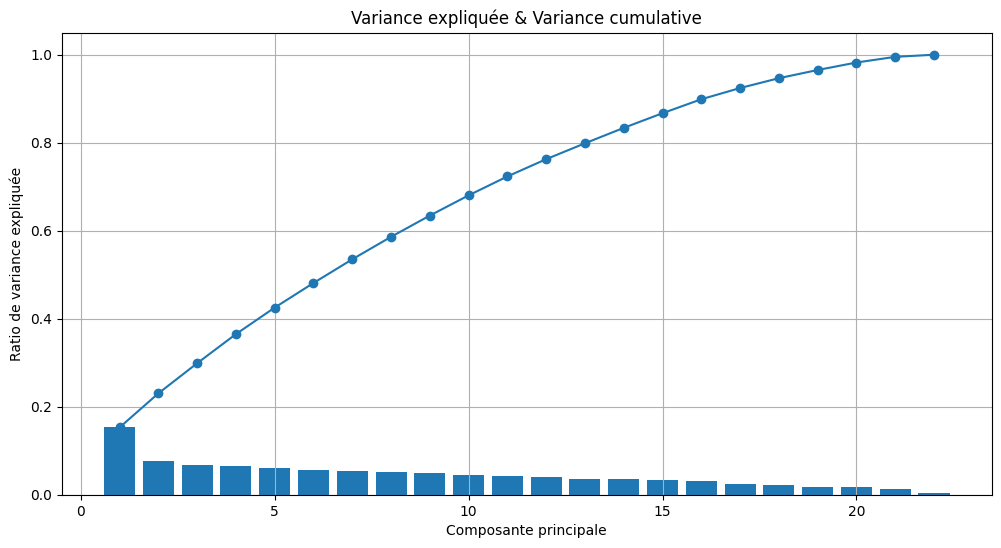

--------------------------------------------------------------------------------
		Visualisation de la Variance Expliquée 
--------------------------------------------------------------------------------
Nombre optimal de composantes conservant 95% de la variance : 19
--------------------------------------------------------------------------------
		PCA Reduit Avec Le Nombre Optimal 
--------------------------------------------------------------------------------
Nouvelle dimension Apres PCA :  (303, 19)
--------------------------------------------------------------------------------
		Visualisation 2D PCA 
--------------------------------------------------------------------------------


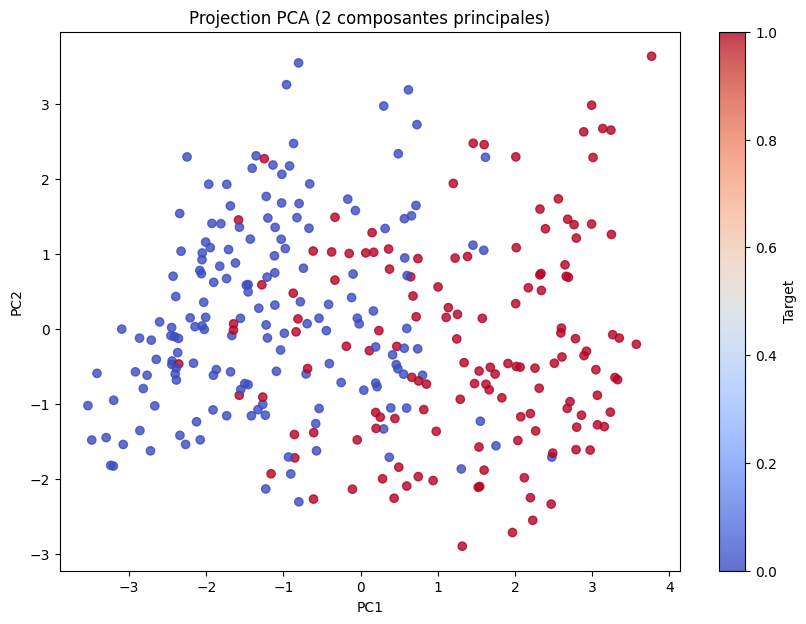

PCA Terminé Fichier Exporté: heart_pca.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Chargement des données netoyées
df = pd.read_csv("heart_clened.csv")
print("--"*40)
print( "\t\tApperçu Des Données " )
print("--"*40)
display(df.head())
print(df.shape)
print(df.info())

#Separation X / y
X = df.drop("target", axis=1)
y = df["target"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("--"*40)
print( "\t\tVisualisation de la Variance Expliquée " )
print("--"*40)
plt.figure(figsize=(12,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title("Variance expliquée & Variance cumulative")
plt.xlabel("Composante principale")
plt.ylabel("Ratio de variance expliquée")
plt.grid(True)
plt.show()

#determination du nombre optimal de composants
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print("--"*40)
print( "\t\tVisualisation de la Variance Expliquée " )
print("--"*40)
print(f"Nombre optimal de composantes conservant 95% de la variance : {optimal_components}")

#PCA reduit avec le nombre optimal
pca_optimal = PCA(n_components=optimal_components)
X_pca = pca_optimal.fit_transform(X_scaled)
print("--"*40)
print( "\t\tPCA Reduit Avec Le Nombre Optimal " )
print("--"*40)
print("Nouvelle dimension Apres PCA : ", X_pca.shape)

# visualisation 2D PCA
print("--"*40)
print( "\t\tVisualisation 2D PCA " )
print("--"*40)
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA (2 composantes principales)")
plt.colorbar(label="Target")
plt.show()

# Export des données transformées
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(optimal_components)])
pca_df["target"] = y.values
pca_df.to_csv("heart_pca.csv", index=False)
print("PCA Terminé Fichier Exporté: heart_pca.csv")
